In [8]:
import torch
import dataset
import matplotlib.pyplot as plt
import importlib

In [60]:
importlib.reload(dataset)

<module 'dataset' from 'g:\\Dev\\AI\\Projects\\ImageGeneration\\dataset.py'>

In [87]:
diffusion_data = dataset.Diffusion(20)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


4


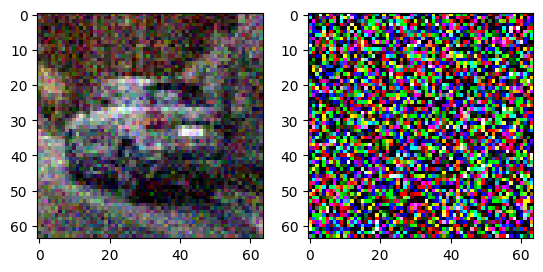

In [83]:
corrupted_image, noise, timestep = diffusion_data[0]
print(timestep)
fig, axs = plt.subplots(1, 2)
axs[0].imshow(corrupted_image.permute(1,2,0))
axs[1].imshow(noise.permute(1,2,0))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


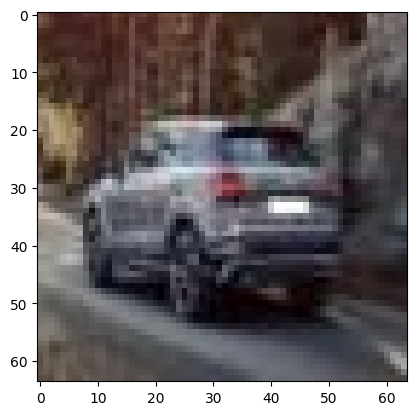

In [37]:
# reverse process 
bt = 1 - torch.cos(torch.pi / 2 * torch.tensor(1) / 10)
reversed_image = (corrupted_image - torch.sqrt(bt) * noise) / torch.sqrt(1 - bt)
plt.imshow(reversed_image.permute(1,2,0))

In [2]:
data = dataset.AllVae()

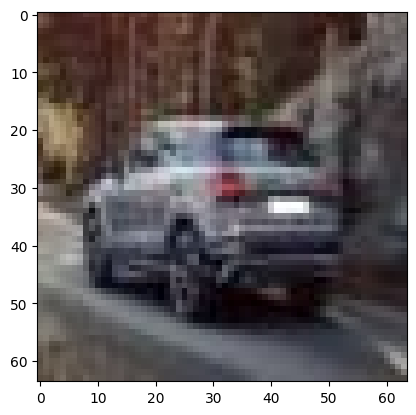

In [3]:
image = data[0][0]
plt.imshow(image.permute(1,2,0))

In [4]:
MAX_TIMESTEPS = 10

In [10]:
variance_schedule = 1 - torch.cos(torch.pi / 2 * torch.tensor(5) / MAX_TIMESTEPS)
variance_schedule

tensor(0.2929)

In [7]:
torch.cos(torch.pi / 2 * torch.tensor(10) / MAX_TIMESTEPS)

tensor(-4.3711e-08)

In [38]:
def compute_alpha_t(t):
    cumulative = 1
    for i in range(1, t+1):
        cumulative *= torch.cos(torch.pi / 2 * torch.tensor(i) / MAX_TIMESTEPS)
    return cumulative

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

tensor(0.3036)
tensor(0.3042)
tensor(0.3035)
tensor(0.3007)
tensor(0.3003)
tensor(0.2955)
tensor(0.2951)
tensor(0.2907)
tensor(0.2833)
tensor(0.2736)
tensor(0.2659)
tensor(0.2626)
tensor(0.2476)
tensor(0.2364)
tensor(0.2345)
tensor(0.2072)
tensor(0.2022)
tensor(0.1784)
tensor(0.1654)
tensor(0.1476)
tensor(0.1390)
tensor(0.1281)
tensor(0.0996)
tensor(0.0848)
tensor(0.0817)
tensor(0.0621)
tensor(0.0424)
tensor(0.0500)
tensor(0.0286)
tensor(0.0069)
tensor(0.0172)
tensor(0.0330)
tensor(0.0163)
tensor(0.0061)
tensor(0.0013)
tensor(0.0056)
tensor(0.0014)
tensor(0.0061)
tensor(-0.0050)
tensor(-0.0049)
tensor(-0.0069)
tensor(-0.0062)
tensor(-0.0118)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(-0.0149)
tensor(-0.0025)
tensor(0.0016)
tensor(0.0131)
tensor(0.0053)
tensor(0.0138)
tensor(nan)


d:\PythonLang\Py3-11-2\Lib\site-packages\matplotlib\cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


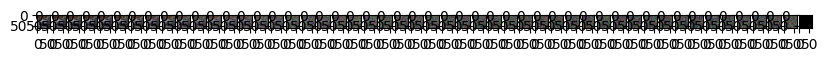

In [59]:
MAX_TIMESTEPS = 50
fig, axs = plt.subplots(1, MAX_TIMESTEPS, figsize=(10, 10))


for i in range(MAX_TIMESTEPS):
    normal = torch.randn_like(image)
    

    alpha_t = compute_alpha_t(i+1)
    corrupted = torch.sqrt(alpha_t) * image + torch.sqrt(1 - alpha_t) * torch.randn_like(image)
    print(corrupted.mean())
    axs[i].imshow(corrupted.permute(1,2,0))


# plt.imshow()

In [124]:
# test model
from diffusion import UNetNoisePredictor
model = UNetNoisePredictor(5)
model.load_state_dict(torch.load("./trained/diffusion.pth"))

<All keys matched successfully>

In [117]:
corrupt, noise, timestep = diffusion_data[0]

In [118]:
corrupt.shape

torch.Size([3, 64, 64])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.1684) tensor(0.1775)


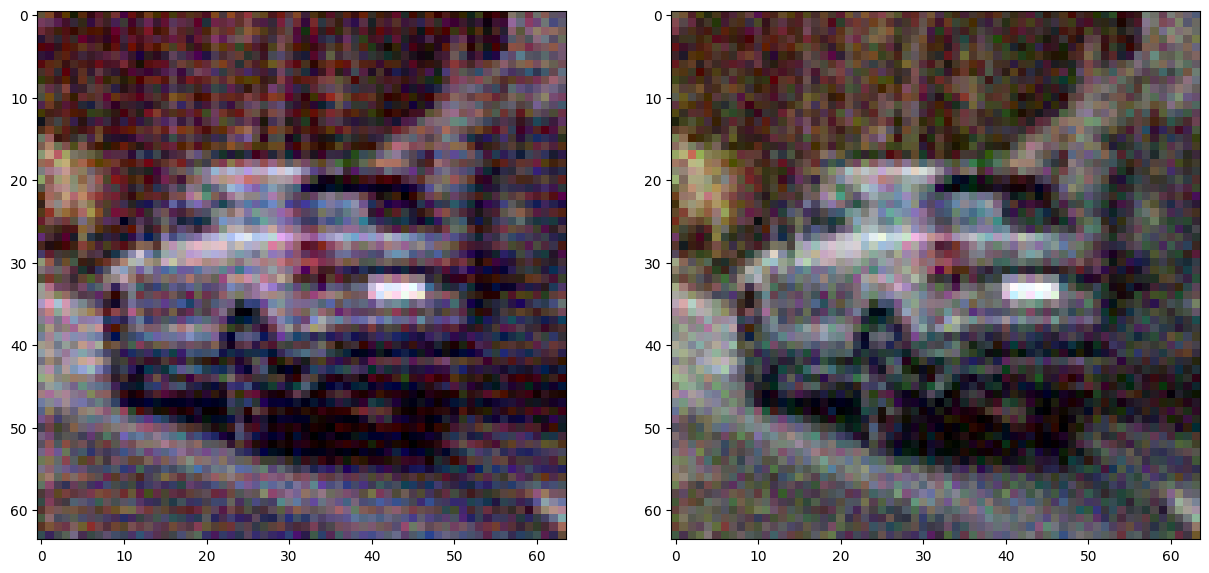

In [132]:
bt = 1 - torch.cos(torch.pi / 2 * torch.tensor(1) / 20)
reversed_image = (corrupt - torch.sqrt(bt) * predicted_noise) / torch.sqrt(1 - bt)
# print(reversed_image)
fig, axs = plt.subplots(1, 2, figsize=(15,15))

print(corrupt.std(), reversed_image.std())

axs[1].imshow(corrupt.permute(1,2,0))
axs[0].imshow(reversed_image.squeeze().permute(1,2,0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.3459)


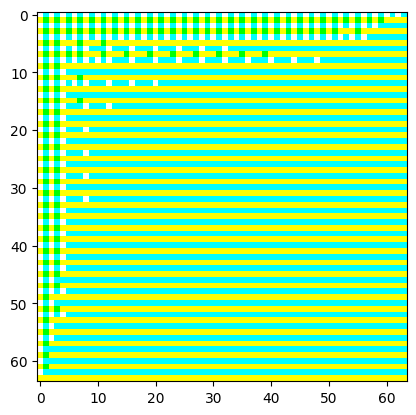

In [127]:
predicted_noise = model(corrupt.unsqueeze(0)).detach()
print(predicted_noise.mean())
plt.imshow(predicted_noise.squeeze().permute(1,2,0))